Sports clothing and athleisure attire is a huge industry, worth approximately [$193 billion in 2021](https://www.statista.com/statistics/254489/total-revenue-of-the-global-sports-apparel-market/) with a strong growth forecast over the next decade! 

In this notebook, I will undertake the role of a product analyst for an online sports clothing company. The company is specifically interested in how it can improve revenue. You will dive into product data such as pricing, reviews, descriptions, and ratings, as well as revenue and website traffic, to produce recommendations for its marketing and sales teams.  

We've been provided with four datasets to investigate:

#  brands.csv

| Columns | Description |
|---------|-------------|
| `product_id` | Unique product identifier |
| `brand` | Brand of the product | 

# finance.csv

| Columns | Description |
|---------|-------------|
| `product_id` | Unique product identifier |
| `listing_price` | Original price of the product | 
| `sale_price` | Discounted price of the product |
| `discount` | Discount off the listing price, as a decimal | 
| `revenue` | Revenue generated by the product |

# info.csv

| Columns | Description |
|---------|-------------|
| `product_name` | Name of the product | 
| `product_id` | Unique product identifier |
| `description` | Description of the product |

# reviews.csv

| Columns | Description |
|---------|-------------|
| `product_id` | Unique product identifier |
| `rating` | Average product rating | 
| `reviews` | Number of reviews for the product |

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

brands = pd.read_csv("brands.csv") 
finance = pd.read_csv("finance.csv")
info = pd.read_csv("info.csv")
reviews = pd.read_csv("reviews.csv")

Task 1: Data Merging
The first task is to merge the datasets into a single dataframe called `sports`.

In [46]:
sports = pd.merge(brands, finance, on='product_id')
sports = pd.merge(sports, info, on='product_id')
sports = pd.merge(sports, reviews, on='product_id')

Task 2: Data Cleaning
The next step is to clean the data. This involves checking for missing values and
removing any duplicates.

In [47]:
sports.isnull().sum()

product_id        0
brand            59
listing_price    59
sale_price       59
discount         59
revenue          59
product_name     59
description      62
rating           59
reviews          59
dtype: int64

In [48]:
# Drop rows that contain missing values
sports = sports.dropna(how='any')
sports.head(5)

,product_id,brand,listing_price,sale_price,discount,revenue,product_name,description,rating,reviews
1,G27341,Adidas,75.99,37.99,0.5,1641.17,Women's adidas Originals Sleek Shoes,"A modern take on adidas sport heritage, tailor...",3.3,24.0
2,CM0081,Adidas,9.99,5.99,0.4,398.93,Women's adidas Swim Puka Slippers,These adidas Puka slippers for women's come wi...,2.6,37.0
3,B44832,Adidas,69.99,34.99,0.5,2204.37,Women's adidas Sport Inspired Questar Ride Shoes,"Inspired by modern tech runners, these women's...",4.1,35.0
4,D98205,Adidas,79.99,39.99,0.5,5182.70,Women's adidas Originals Taekwondo Shoes,This design is inspired by vintage Taekwondo s...,3.5,72.0
5,B75586,Adidas,47.99,19.20,0.6,1555.20,Women's adidas Sport Inspired Duramo Lite 2.0 ...,Refine your interval training in these women's...,1.0,45.0


Find the volume of products and associated revenue for Adidas and Nike products,
split based on "listing_price" quartiles.
Split the data into quartiles. Label products priced up to quartile one as
"Budget", quartile two as "Average", 
quartile three as "Expensive", and quartile four as "Elite"

In [49]:
labels = ['Budget', 'Average', 'Expensive', 'Elite']
adidas_nike = sports[sports['brand'].isin(['Adidas', 'Nike'])]
quartiles = pd.qcut(adidas_nike['listing_price'], q=4, labels=labels)
adidas_nike.loc[:, 'price_label'] = quartiles
adidas_vs_nike = adidas_nike.groupby(['brand', 'price_label']).agg(num_products = ('product_id', 'nunique'), mean_revenue = ('revenue', 'mean'),)
adidas_vs_nike['mean_revenue'] = adidas_vs_nike['mean_revenue'].round(2)
adidas_vs_nike.reset_index(inplace=True)
print(adidas_vs_nike)

    brand price_label  num_products  mean_revenue
0  Adidas      Budget           574       2015.68
1  Adidas     Average           655       3035.30
2  Adidas   Expensive           759       4621.56
3  Adidas       Elite           587       8302.78
4    Nike      Budget           357       1596.33
5    Nike     Average             8        675.59
6    Nike   Expensive            47        500.56
7    Nike       Elite           130       1367.45


/var/folders/f0/850z22vd73190gbkx3wrzrxh0000gn/T/ipykernel_1775/622236021.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  adidas_vs_nike = adidas_nike.groupby(['brand', 'price_label']).agg(num_products = ('product_id', 'nunique'), mean_revenue = ('revenue', 'mean'),)


Next, we want to find out whether any differences exist between the word count of 
a product's description and its mean rating. 
1. Split product description length into bins of 100 characters and calculate the
average rating and number of reviews.
2. Store the results as a pandas DataFrame called description_lengths containing
the following columns: "description_length", "mean_rating", "num_reviews", again
rounding numeric values to two decimal places.

In [50]:
# Calculate the length of each product description
sports['description_length'] = sports['description'].str.len()

# Split the description length into bins of 100 characters
sports['description_length_bin'] = pd.cut(sports['description_length'], bins=range(0, sports['description_length'].max()+100, 100))

# Group the data by the binned description length
description_lengths = sports.groupby('description_length_bin').agg(
    mean_rating = ('rating', 'mean'),
    num_reviews = ('reviews', 'sum')
)

# Round mean_rating to two decimal places
description_lengths['mean_rating'] = description_lengths['mean_rating'].round(2)
description_lengths.reset_index(inplace=True)

print(description_lengths)

  description_length_bin  mean_rating  num_reviews
0               (0, 100]         2.26         36.0
1             (100, 200]         3.19      17719.0
2             (200, 300]         3.28      76115.0
3             (300, 400]         3.29      28994.0
4             (400, 500]         3.35       4984.0
5             (500, 600]         3.12        852.0
6             (600, 700]         3.65        818.0


/var/folders/f0/850z22vd73190gbkx3wrzrxh0000gn/T/ipykernel_1775/2947672002.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  description_lengths = sports.groupby('description_length_bin').agg(


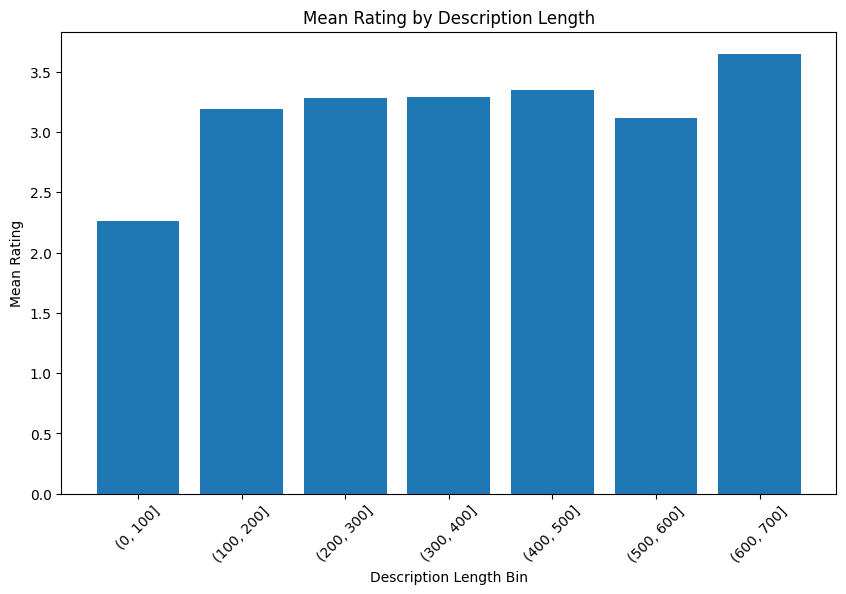

In [51]:
# Convert description_length_bin to string to avoid errors
description_lengths['description_length_bin'] = description_lengths['description_length_bin'].astype(str)

plt.figure(figsize=(10, 6))
plt.bar(description_lengths['description_length_bin'], description_lengths['mean_rating'])
plt.xlabel('Description Length Bin')
plt.ylabel('Mean Rating')
plt.title('Mean Rating by Description Length')
plt.xticks(rotation=45)  
plt.show()

Lastly, how does the volume of products and median revenue vary between clothing and
footwear?
1. Search "description" for "shoe*", "trainer*", or "foot*" and use the results to calculate the number of footwear products versus clothing products sold by the company and the median revenue for each of the two product types.
2. Create a pandas DataFrame called product_types containing the following columns: "num_clothing_products", "median_clothing_revenue", "num_footwear_products", "median_footwear_revenue". 

In [52]:
def classify_product(description): 
    keywords = ['shoe', 'trainer', 'foot']
    if any(keyword in description for keyword in keywords):
        return 'footwear'
    else:
        return 'Clothing'
sports['product_type'] = sports['description'].apply(classify_product)

In [53]:
# create df product_types
product_types = sports.groupby('product_type').agg(
    num_products = ('product_id', 'nunique'),
    median_revenue = ('revenue', 'median')
)
product_types.reset_index(inplace=True)
print(product_types)

  product_type  num_products  median_revenue
0     Clothing           522          681.83
1     footwear          2595         3088.40
